
# Water Quality and Potability

The data set with which we will work is available in kaggle and can be consulted in the following [link](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability)

The data set consists of the following columns:

* pH: The pH level of the water.
* Hardness: Water hardness, a measure of mineral content.
* Solids: Total dissolved solids in the water.
* Chloramines: Chloramines concentration in the water.
* Sulfate: Sulfate concentration in the water.
* Conductivity: Electrical conductivity of the water.
* Organic_carbon: Organic carbon content in the water.
* Trihalomethanes: Trihalomethanes concentration in the water.
* Turbidity: Turbidity level, a measure of water clarity.
* Potability: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

In [1]:
options(warn = -1)
install.packages('reshape2')
install.packages('reticulate')
library(ggplot2)
library(tidyverse)
library(reshape2)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
df <- read.csv('water_potability.csv')
head(df)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
2,3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
3,8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
4,8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
5,9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
6,5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0


# Data cleaning and imputation

Let's see which columns have missing values

In [4]:
print(apply(df, 2,
      function(x)
        sum(is.na(x))/length(x)))

             ph        Hardness          Solids     Chloramines         Sulfate 
     0.14987790      0.00000000      0.00000000      0.00000000      0.23840049 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity      Potability 
     0.00000000      0.00000000      0.04945055      0.00000000      0.00000000 


Let's eliminate observations that contain missing values.

In [5]:
df_t <- df %>%
  filter(complete.cases(.))

head(df_t)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
2,9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
3,5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0
4,10.223862,248.0717,28749.72,7.513408,393.6634,283.6516,13.789695,84.60356,2.672989,0
5,8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.363817,62.79831,4.401425,0
6,11.180284,227.2315,25484.51,9.077200,404.0416,563.8855,17.927806,71.97660,4.370562,0


# Data visualization

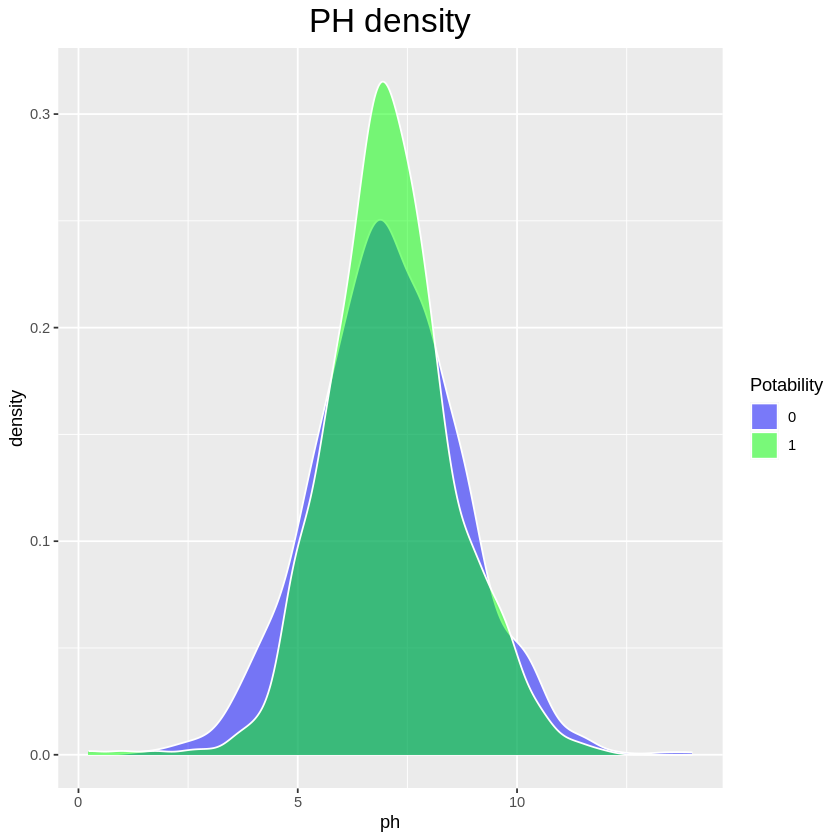

In [ ]:
ggplot(data = df_t) +
  geom_density(aes(x = ph,fill = as.factor(Potability)),
  color = "white", alpha = 0.5) +
  theme(plot.title = element_text(hjust=0.5,size = 20))+
  scale_fill_manual(values = c('blue','green'))+
  labs(fill = "Potability", title = "PH density")


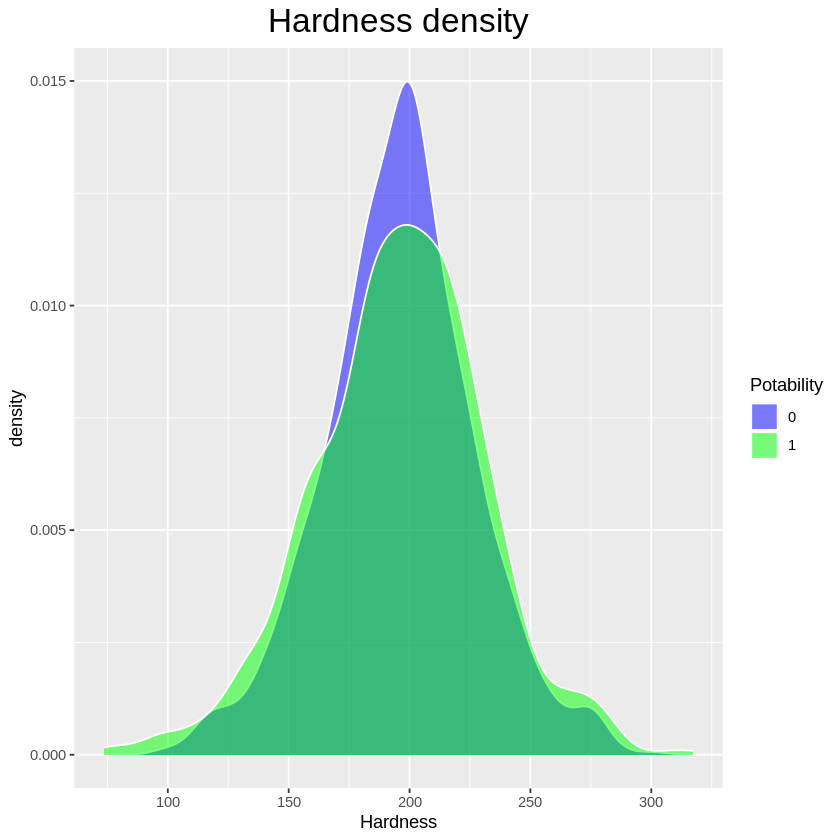

In [ ]:
ggplot(data = df_t) +
  geom_density(aes(x = Hardness,fill = as.factor(Potability)),
  color = "white", alpha = 0.5) +
  theme(plot.title = element_text(hjust = 0.5,size = 20))+
  scale_fill_manual(values = c('blue','green'))+
  labs(fill = "Potability", title = "Hardness density")

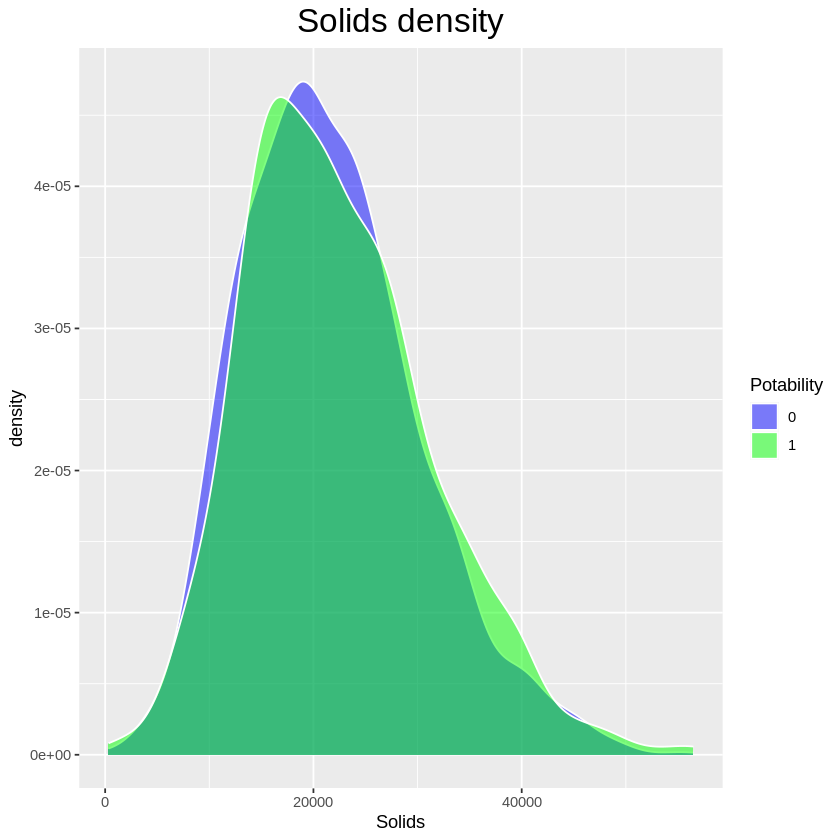

In [ ]:
ggplot(data = df_t) +
  geom_density(aes(x = Solids,fill = as.factor(Potability)),
  color = "white", alpha = 0.5) +
  theme(plot.title = element_text(hjust = 0.5,size = 20))+
  scale_fill_manual(values = c('blue','green'))+
  labs(fill = "Potability", title = "Solids density")

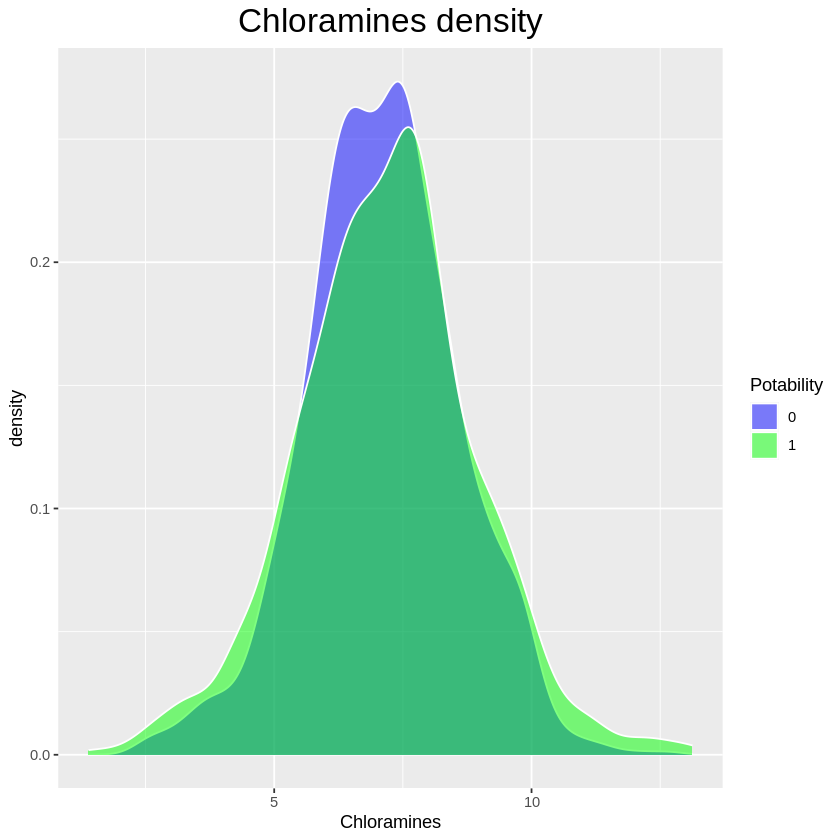

In [ ]:
ggplot(data = df_t) +
  geom_density(aes(x = Chloramines,fill = as.factor(Potability)),
  color = "white", alpha = 0.5) +
  theme(plot.title = element_text(hjust = 0.5,size = 20))+
  scale_fill_manual(values = c('blue','green'))+
  labs(fill = "Potability", title = "Chloramines density")

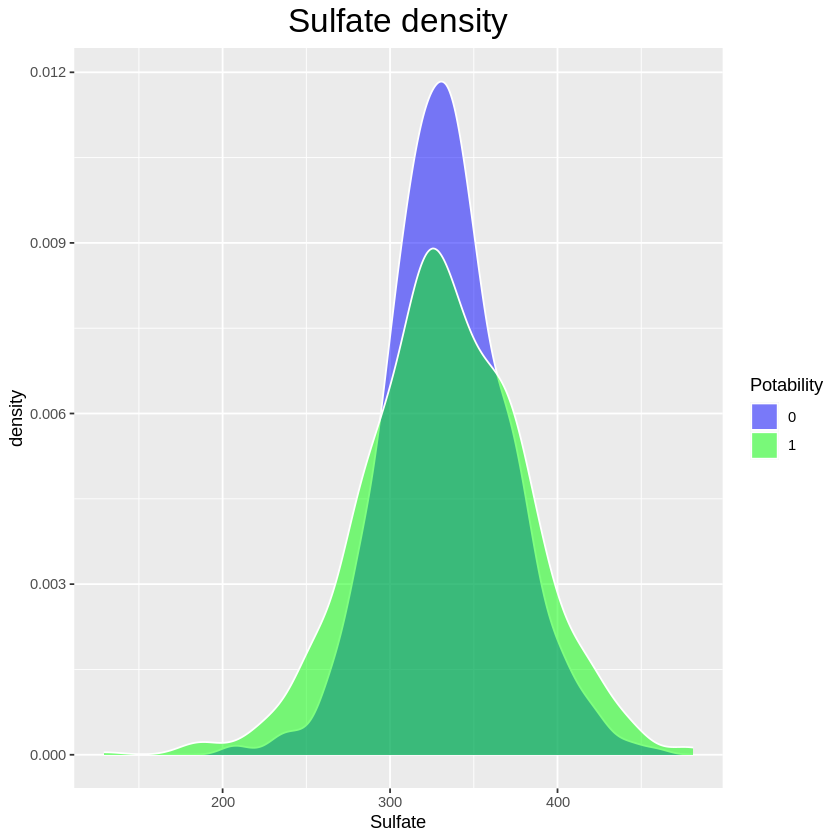

In [ ]:
ggplot(data = df_t) +
  geom_density(aes(x = Sulfate,fill = as.factor(Potability)),
  color = "white", alpha = 0.5) +
  theme(plot.title = element_text(hjust = 0.5,size = 20))+
  scale_fill_manual(values = c('blue','green'))+
  labs(fill = "Potability", title = "Sulfate density")

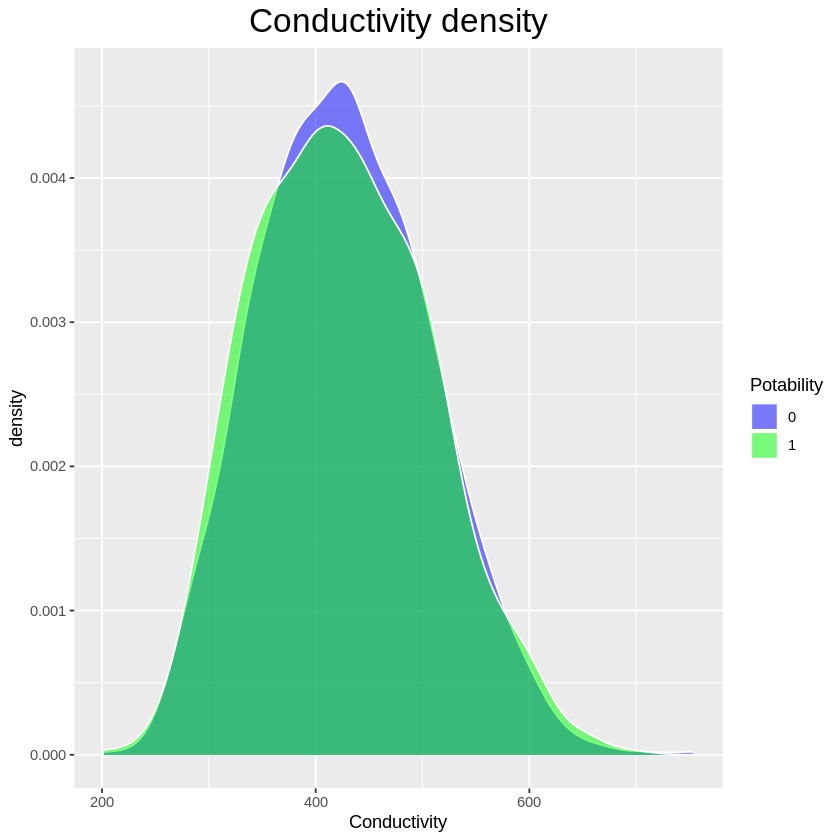

In [ ]:
ggplot(data = df_t) +
  geom_density(aes(x = Conductivity,fill = as.factor(Potability)),
  color = "white", alpha = 0.5) +
  theme(plot.title = element_text(hjust = 0.5,size = 20))+
  scale_fill_manual(values = c('blue','green'))+
  labs(fill = "Potability", title = "Conductivity density")

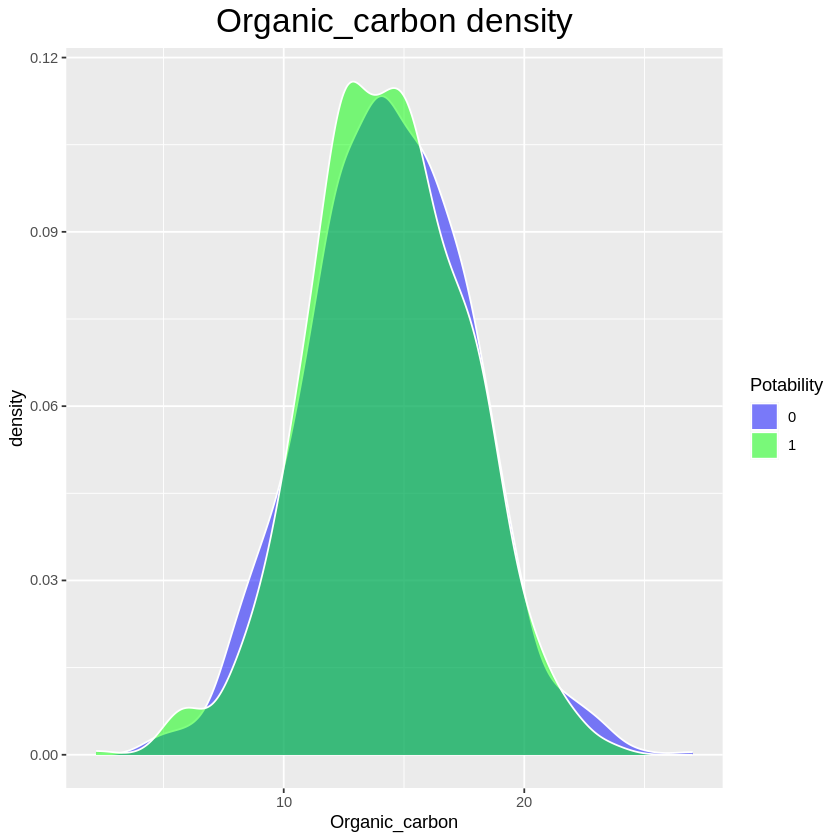

In [ ]:
ggplot(data = df_t) +
  geom_density(aes(x = Organic_carbon,fill = as.factor(Potability)),
  color = "white", alpha = 0.5) +
  theme(plot.title = element_text(hjust = 0.5,size = 20))+
  scale_fill_manual(values = c('blue','green'))+
  labs(fill = "Potability", title = "Organic_carbon density")

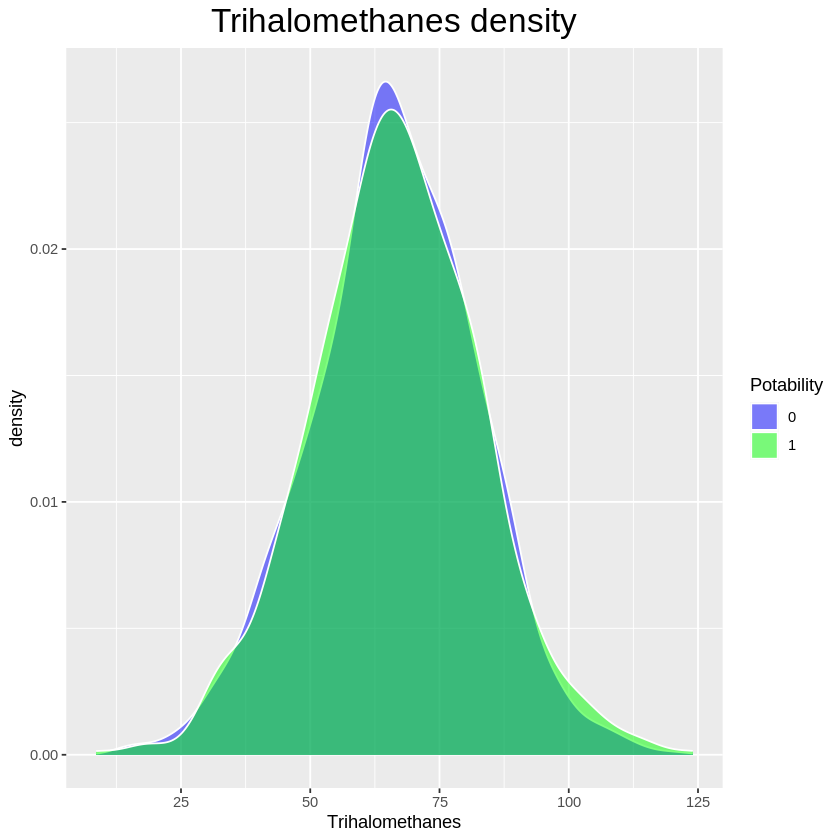

In [ ]:
ggplot(data = df_t) +
  geom_density(aes(x = Trihalomethanes,fill = as.factor(Potability)),
  color = "white", alpha = 0.5) +
  theme(plot.title = element_text(hjust = 0.5,size = 20))+
  scale_fill_manual(values = c('blue','green'))+
  labs(fill = "Potability", title = "Trihalomethanes density")

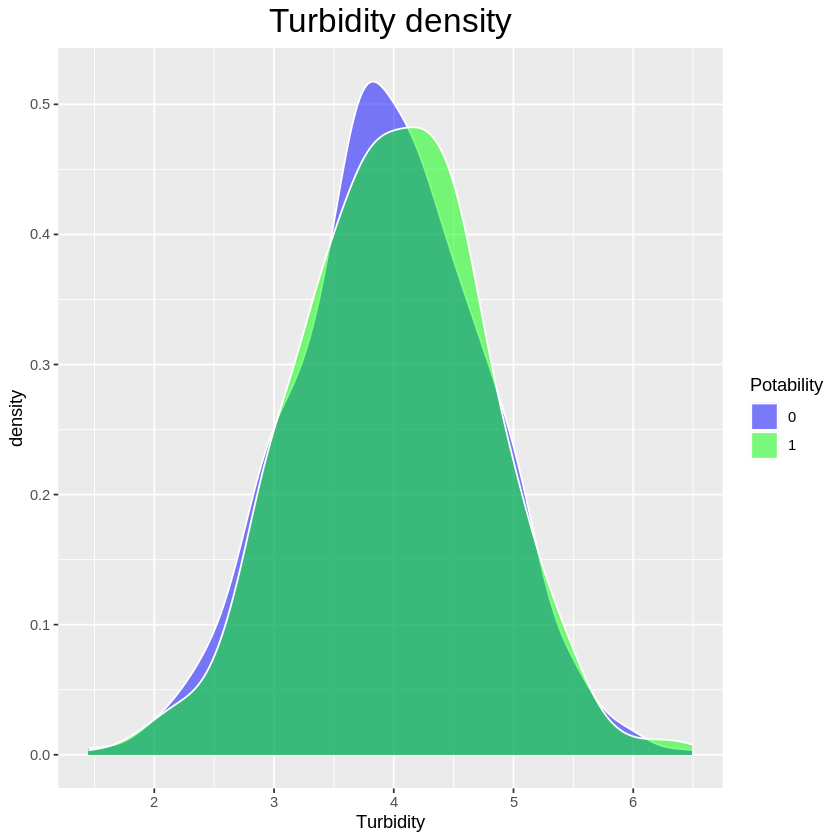

In [ ]:
ggplot(data = df_t) +
  geom_density(aes(x = Turbidity,fill = as.factor(Potability)),
  color = "white", alpha = 0.5) +
  theme(plot.title = element_text(hjust = 0.5,size = 20)) +
  scale_fill_manual(values = c('blue','green'))+
  labs(fill = "Potability", title = "Turbidity density")

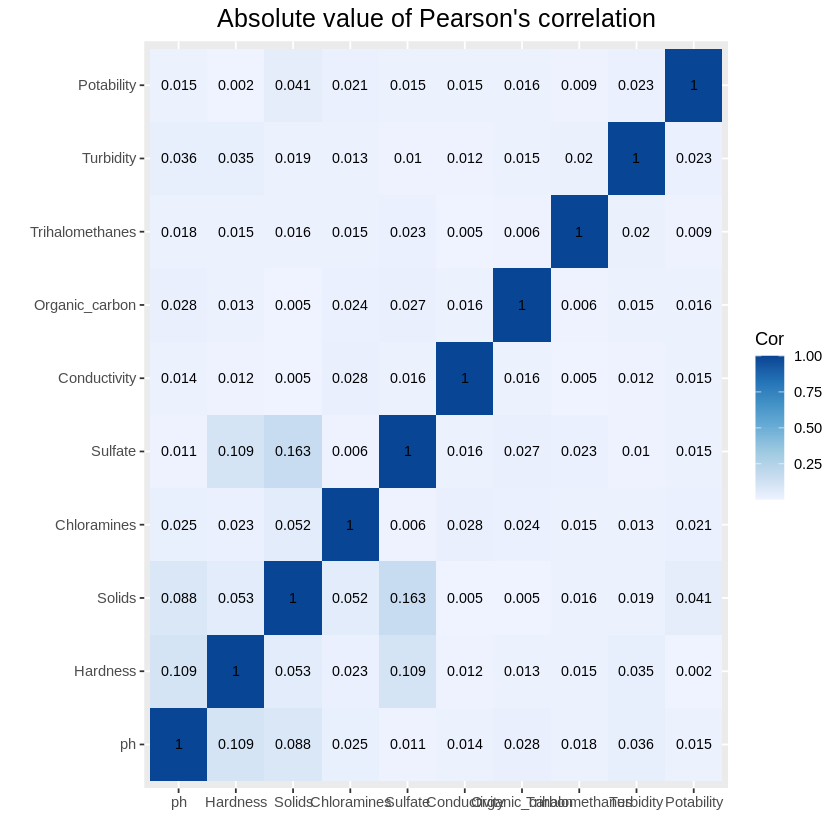

In [ ]:
cor <- abs(cor(df_t))
m <- melt(cor)
colnames(m)=c("x","y","Cor")
m$Cor <- round(m$Cor,3)

p <- ggplot(data=m, aes(x,y,fill = Cor)) +
  geom_tile() +
  geom_text(aes(label = Cor),
  color = 'black',size = 3) +
  scale_fill_distiller(direction = 1)  +
  labs(x = "", y = "", title = "Absolute value of Pearson's correlation") +
  theme(plot.title = element_text(hjust = 0.5,size = 15))


p

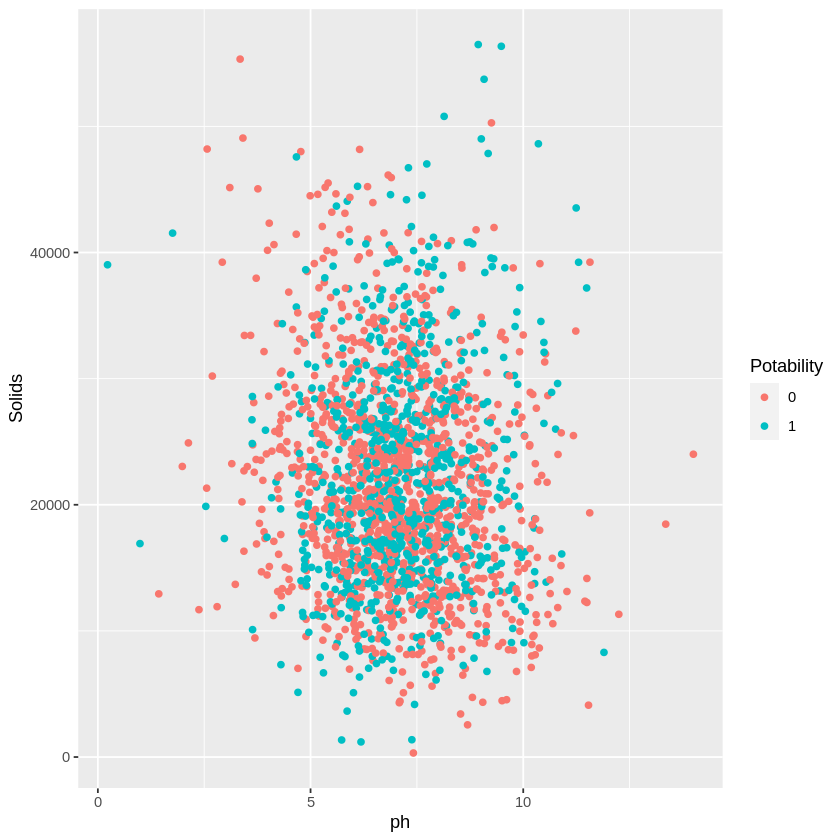

In [ ]:
ggplot(data = df_t) +
  geom_point(aes(x = ph, y = Solids,
  color = as.factor(Potability))) +
    labs(color = "Potability")

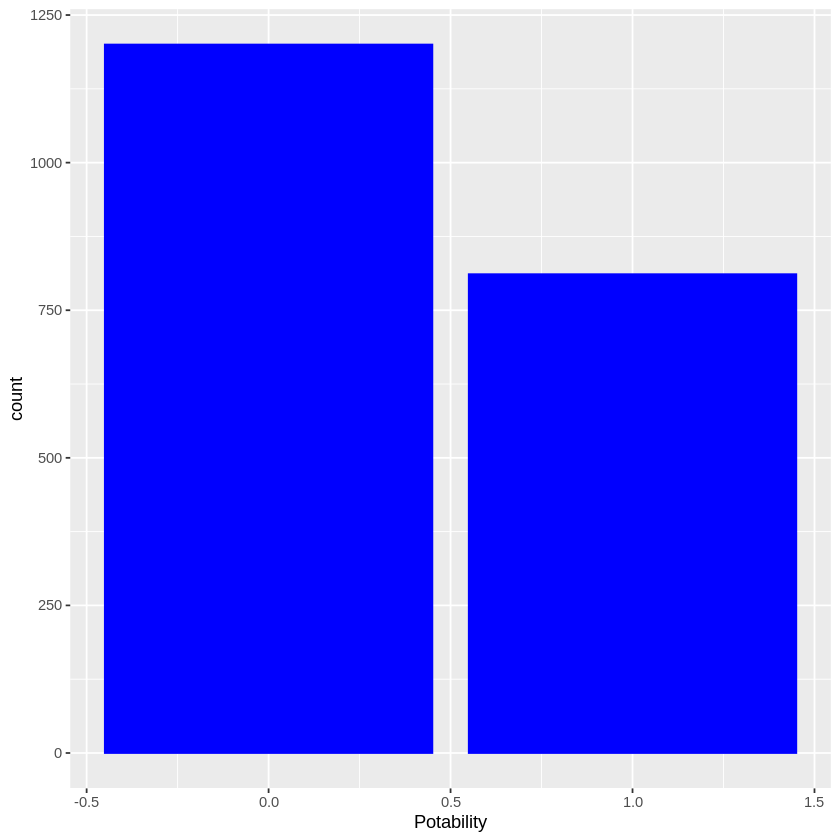

In [ ]:
ggplot(data = df_t) +
  geom_bar(aes(x = Potability), color = "blue", fill = "blue")

# Predictive model

In [42]:
#split the data set into training and testing
set.seed(pi)
sample_train <- sample(1:dim(df_t)[1], ceiling(dim(df_t)[1]*.80), replace = FALSE)

df_train <- df_t[sample_train,]
df_test <- df_t[-sample_train,]

X_train <- df_train[,1:9]
y_train <- df_train$Potability

X_test <- df_test[,1:9]
y_test <- df_test$Potability


In [70]:
model <- qda(y_train ~ ., X_train)

In [71]:
y_pred <- predict(model,X_test)$class

In [72]:
report <- import("sklearn.metrics")$classification_report

cat(report(y_test,as.numeric(as.vector(y_pred))), sep = "\n")

              precision    recall  f1-score   support

           0       0.65      0.86      0.74       231
           1       0.67      0.37      0.48       171

    accuracy                           0.65       402
   macro avg       0.66      0.62      0.61       402
weighted avg       0.66      0.65      0.63       402

